In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets 

In [2]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]

X, y = datasets.make_blobs(n_samples = n_pts, random_state = 123, centers = centers, cluster_std=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))

In [3]:
x_data

tensor([[-0.1372, -0.0715],
        [ 0.8044, -0.3706],
        [-0.6022, -0.6194],
        [ 0.5709, -0.5120],
        [ 0.0064,  0.1533],
        [-0.8743,  0.9703],
        [ 0.1974, -0.3713],
        [-0.6340,  0.9124],
        [-0.4818,  0.4068],
        [ 0.1975,  0.1808],
        [-0.6259,  0.0656],
        [-0.3126,  0.1675],
        [-0.1085,  1.3953],
        [ 0.0983,  0.9278],
        [-0.3646,  0.4953],
        [ 0.7568, -1.2912],
        [ 0.3348,  0.5658],
        [-0.6613,  0.4496],
        [ 0.3434, -0.4440],
        [-0.4276,  0.9711],
        [-0.0984,  0.6545],
        [ 0.4569,  0.6652],
        [-0.1290,  0.4305],
        [ 0.6705, -1.1422],
        [ 0.8249, -0.3001],
        [ 0.7226, -0.5848],
        [-0.4989,  0.7753],
        [-0.0399, -0.0069],
        [ 1.0581, -0.6436],
        [ 0.6015, -0.3865],
        [ 0.5718, -1.2448],
        [-0.2051,  1.0963],
        [ 1.1435, -0.6081],
        [-0.9793,  0.5798],
        [ 0.2037, -0.4708],
        [-0.7930,  0

In [4]:
print(y)

[0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1
 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1
 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0]


In [5]:
def scatter_plot():
  plt.scatter(X[y == 0, 0], X[y == 0, 1])
  plt.scatter(X[y == 1, 0], X[y == 1, 1])

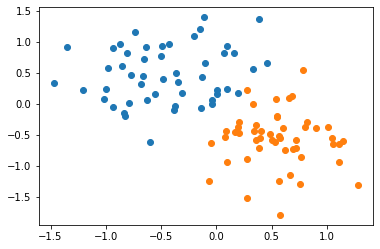

In [6]:
scatter_plot()

In [7]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0  

In [8]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [9]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
b1 = b[0]
def get_params():
  return (w1.item(), w2.item(), b1.item())

In [10]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2, 2])
  x2 = (w1 * x1 + b1) / (-w2)
  plt.plot(x1, x2, 'r')
  scatter_plot()
  plt.grid()


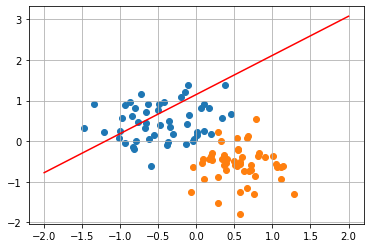

In [11]:
plot_fit("Initial Model")

In [12]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [13]:
epochs = 1000
losses = []
for epoch in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("Epoch: ", epoch, "Loss: ", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:  0 Loss:  0.6185115575790405
Epoch:  1 Loss:  0.617464005947113
Epoch:  2 Loss:  0.6164200305938721
Epoch:  3 Loss:  0.6153795123100281
Epoch:  4 Loss:  0.6143423914909363
Epoch:  5 Loss:  0.6133086681365967
Epoch:  6 Loss:  0.6122783422470093
Epoch:  7 Loss:  0.6112514734268188
Epoch:  8 Loss:  0.6102279424667358
Epoch:  9 Loss:  0.6092078685760498
Epoch:  10 Loss:  0.6081911325454712
Epoch:  11 Loss:  0.6071776747703552
Epoch:  12 Loss:  0.606167733669281
Epoch:  13 Loss:  0.6051609516143799
Epoch:  14 Loss:  0.604157567024231
Epoch:  15 Loss:  0.6031573414802551
Epoch:  16 Loss:  0.6021605730056763
Epoch:  17 Loss:  0.6011670231819153
Epoch:  18 Loss:  0.6001767516136169
Epoch:  19 Loss:  0.599189817905426
Epoch:  20 Loss:  0.5982059240341187
Epoch:  21 Loss:  0.5972253680229187
Epoch:  22 Loss:  0.5962480306625366
Epoch:  23 Loss:  0.5952739119529724
Epoch:  24 Loss:  0.5943029522895813
Epoch:  25 Loss:  0.5933352112770081
Epoch:  26 Loss:  0.5923706293106079
Epoch:  27 Loss

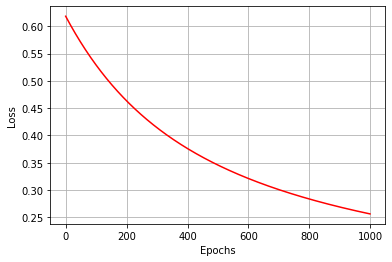

In [14]:
plt.plot(range(epochs), losses, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()

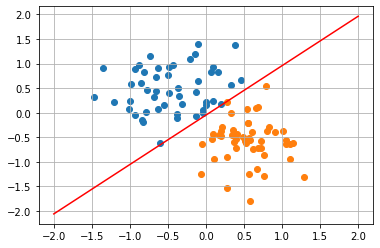

In [15]:
plot_fit("Trained Model")


Red point positive probability: 0.9424158334732056
Black point positive probability: 0.05055497586727142
Red point class: 1
Black point class: 0


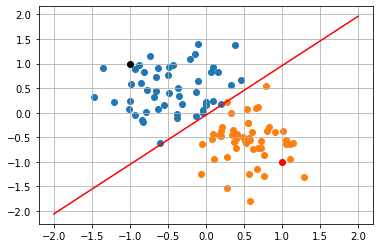

In [18]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
plot_fit("Trained Model")
print("Red point positive probability: {}".format(model.forward(point1).item()))
print("Black point positive probability: {}".format(model.forward(point2).item()))
print("Red point class: {}".format(model.predict(point1)))
print("Black point class: {}".format(model.predict(point2)))